<a href="https://colab.research.google.com/github/lotterinng/Sovereign_Wealth_Fund-SVRegression-Analysis/blob/main/SWF_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Ingestion & Basic Cleaning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# For preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Hypothetical data load
df = pd.read_excel('/content/Norway Fund.xlsx')  # adapt path
df.set_index('Year', inplace=True)  # treat 'Year' as index, optional

# Drop rows with missing critical values
df.dropna(inplace=True)

# Example subset of columns
feature_cols = [
    'Equities', 'Fixed Income', 'Real Estate', 'Renewable Energy',
    'Equity Returns (%)', 'Fixed income Returns (%)',
    'Unlisted real estate Returns (%)', 'Unlisted renewable infrastructure Returns (%)',
    'Annual return(%)',
    'Fiscal Balance, % of GDP', 'GDP per Capita (US$)', 'GNI growth (annual %)',
    'Gross debt (% of GDP)', 'Inflation, consumer Prices(annual %)',
    'Unemployment Rate (%)', 'Commodity Price(Crude Oil per Barrel)'
]

# 3. IMPUTE MISSING VALUES IN THE SELECTED COLUMNS
#    Instead of df.dropna(), we fill NaNs using the mean of each column.
imputer = SimpleImputer(strategy='mean')
df[feature_cols] = imputer.fit_transform(df[feature_cols])

In [ ]:
df.describe()

,Equities,Fixed Income,Real Estate,Renewable Energy,Equity Returns (%),Fixed income Returns (%),Unlisted real estate Returns (%),Unlisted renewable infrastructure Returns (%),Annual return(%),Accumulated annualised return(%),"Fiscal Balance, % of GDP",GDP per Capita (US$),GNI growth (annual %),Gross debt (% of GDP),"Inflation, consumer Prices(annual %)",Unemployment Rate (%),Commodity Price(Crude Oil per Barrel)
count,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,4.269609e+11,2.176093e+11,1.186045e+10,2.617011e+08,8.232222,3.833333,2.112222,-0.175556,6.713333,5.867778,10.798889,74631.723704,1.904815,37.851481,2.530370,3.696296,60.220000
std,3.771990e+11,1.289932e+11,1.412243e+10,6.491529e+08,18.167306,4.894103,5.474709,3.767693,10.434231,1.578245,5.788081,22461.403043,1.252027,7.509635,1.391119,0.567350,26.255562
min,9.178639e+09,1.354451e+10,0.000000e+00,0.000000e+00,-40.710000,-12.110000,-12.370000,-17.690000,-23.310000,2.940000,-2.580000,34804.460000,-0.900000,24.960000,0.500000,2.490000,14.420000
25%,7.730521e+10,1.093755e+11,0.000000e+00,0.000000e+00,-2.910000,0.445000,0.000000,0.000000,2.615000,5.160000,6.860000,62407.850000,1.240000,31.170000,1.700000,3.325000,40.595000
50%,3.258609e+11,2.271671e+11,1.857145e+09,0.000000e+00,12.470000,4.320000,0.000000,0.000000,8.940000,5.700000,10.610000,76430.590000,2.100000,38.800000,2.300000,3.690000,61.950000
75%,6.618565e+11,3.115350e+11,2.757096e+10,0.000000e+00,21.005000,6.955000,6.305000,0.000000,13.005000,6.150000,14.200000,90618.050000,2.620000,42.825000,3.050000,4.210000,78.560000
max,1.242625e+12,4.625283e+11,3.532861e+10,2.231833e+09,34.810000,12.490000,13.640000,5.120000,25.620000,10.840000,25.340000,108729.190000,4.230000,52.590000,5.800000,4.680000,99.670000


# 1.2 Risk-Factor Decomposition
Extract 1–3 dominant factors from the macro/portfolio composition variables. Using PCA

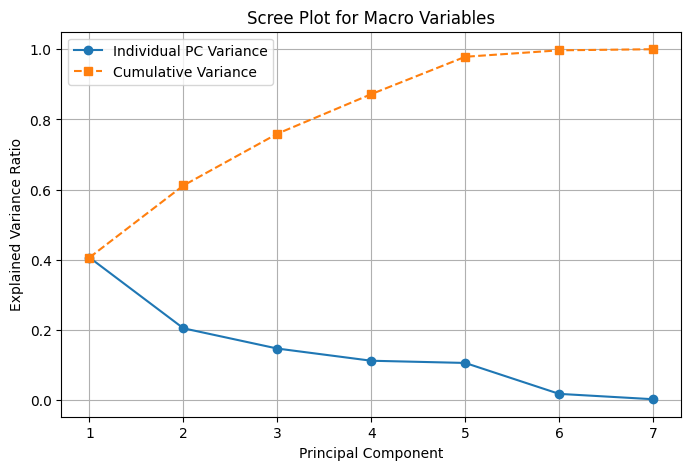

Explained Variance Ratio by Component: [0.40669079 0.20516193 0.14744875 0.11274648 0.10644757 0.01837747
 0.003127  ]
Cumulative Variance Explained: [0.40669079 0.61185272 0.75930147 0.87204795 0.97849553 0.996873
 1.        ]

Factor Loadings (for Factor1 and Factor2):
Fiscal Balance, % of GDP: PC1=0.4463, PC2=0.3737, PC3=0.0710, PC4=-0.3092
GDP per Capita (US$): PC1=0.5122, PC2=-0.1521, PC3=-0.0133, PC4=0.4830
GNI growth (annual %): PC1=-0.0700, PC2=0.6978, PC3=-0.0269, PC4=0.4049
Gross debt (% of GDP): PC1=0.2301, PC2=-0.5144, PC3=0.3015, PC4=-0.0996
Inflation, consumer Prices(annual %): PC1=0.1995, PC2=0.2673, PC3=0.7705, PC4=-0.2624
Unemployment Rate (%): PC1=-0.3727, PC2=-0.1150, PC3=0.5503, PC4=0.5465
Commodity Price(Crude Oil per Barrel): PC1=0.5495, PC2=-0.0325, PC3=-0.0813, PC4=0.3601

Explained Variance (2-factor model): [0.40669079 0.20516193 0.14744875 0.11274648], Total = 87.20%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. SELECT COLUMNS FOR PCA
pca_cols = [
    'Fiscal Balance, % of GDP', 'GDP per Capita (US$)',
    'GNI growth (annual %)', 'Gross debt (% of GDP)',
    'Inflation, consumer Prices(annual %)', 'Unemployment Rate (%)',
    'Commodity Price(Crude Oil per Barrel)'
]

# Suppose df_features is your DataFrame after cleaning and aligning
pca_data = df[pca_cols].dropna()

# 2. SCALE THE DATA FOR PCA
scaler_pca = StandardScaler()
pca_data_scaled = scaler_pca.fit_transform(pca_data)

# 3. FIT A FULL PCA (ALL POSSIBLE COMPONENTS) FOR SCREE PLOT
pca_full = PCA()  # no n_components => will compute all components
pca_full.fit(pca_data_scaled)

# 3.1 EXPLAINED VARIANCE RATIO AND SCREE PLOT
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'o-', label='Individual PC Variance')
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, 's--', label='Cumulative Variance')
plt.title('Scree Plot for Macro Variables')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance)+1))
plt.legend()
plt.grid(True)
plt.show()

print("Explained Variance Ratio by Component:", explained_variance)
print("Cumulative Variance Explained:", cumulative_variance)

# 3.2 DECIDE ON N_COMPONENTS = 2 (e.g., from domain knowledge or scree plot)
n_factors = 4

# 4. FIT PCA WITH N_COMPONENTS = 2
pca = PCA(n_components=n_factors)
pca_factors = pca.fit_transform(pca_data_scaled)

# 5. ATTACH FACTORS BACK TO df_features
df['Factor1'] = pca_factors[:, 0]
df['Factor2'] = pca_factors[:, 1]
df['Factor3'] = pca_factors[:, 2]
df['Factor4'] = pca_factors[:, 3]
#df['Factor5'] = pca_factors[:, 4]

# 6. (Optional) PRINT LOADINGS FOR INTERPRETATION
loadings = pca.components_
print("\nFactor Loadings (for Factor1 and Factor2):")
for i, col in enumerate(pca_cols):
    print(f"{col}: PC1={loadings[0, i]:.4f}, PC2={loadings[1, i]:.4f}, PC3={loadings[2, i]:.4f}, PC4={loadings[3, i]:.4f}")#, PC5={loadings[4, i]:.4f}")

explained_2 = pca.explained_variance_ratio_
print(f"\nExplained Variance (2-factor model): {explained_2}, "
      f"Total = {explained_2.sum():.2%}")

# 1.3 Time-Series Features
With annual data, rolling windows become tricky (fewer data points). You might still do a 3-year rolling average or a lag:

In [ ]:
df['AnnualReturn_lag1'] = df['Annual return(%)'].shift(1)
df['AnnualReturn_lag2'] = df['Annual return(%)'].shift(2)

# Rolling 3-year average of Annual returns
df['AnnualReturn_MA3'] = (
    df['Annual return(%)'].rolling(3).mean()
)



# 1.4 Regime-Switching Indicators (e.g., HMM)


In [ ]:
from sklearn.mixture import GaussianMixture

# Suppose we cluster on (Annual return, Factor1, Factor2) to detect regimes
regime_data = df[['Annual return(%)', 'Factor1', 'Factor2','Factor3', 'Factor4']].values

# Fit a GMM with 2 or 3 regimes
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(regime_data)
regimes = gmm.predict(regime_data)

df['Regime'] = regimes  # 0/1 indicating different macro regimes

df.dropna(inplace=True)  # remove newly introduced NaNs

# 2. GMM Outputs and Interpretation
print("----- GMM Outputs -----")
print("Means (Centroids) of Each Regime:\n", gmm.means_)
print("\nCovariances of Each Regime:\n", gmm.covariances_)
print("\nMixture Weights (Prior Probabilities of Each Regime):\n", gmm.weights_)


----- GMM Outputs -----
Means (Centroids) of Each Regime:
 [[-8.88313897  0.75707962  0.35817756 -0.04341343 -0.40626337]
 [11.16804091 -0.21623918 -0.10230366  0.01239986  0.11603807]]

Covariances of Each Regime:
 [[[ 5.69416765e+01 -1.27354721e+01  2.25223948e+00 -3.07333795e+00
    3.17662710e+00]
  [-1.27354721e+01  4.90110175e+00 -3.96750297e-01  6.46240533e-01
   -1.65564633e-01]
  [ 2.25223948e+00 -3.96750297e-01  1.28843268e+00  4.47208946e-01
   -1.12579739e-01]
  [-3.07333795e+00  6.46240533e-01  4.47208946e-01  8.27468962e-01
   -2.09426051e-01]
  [ 3.17662710e+00 -1.65564633e-01 -1.12579739e-01 -2.09426051e-01
    4.07456519e-01]]

 [[ 2.91997861e+01  1.63055836e+00 -2.61645575e+00 -4.48298954e-02
   -6.32515074e-01]
  [ 1.63055836e+00  2.04962192e+00  1.37468377e-02 -1.72511988e-01
    1.60231062e-01]
  [-2.61645575e+00  1.37468377e-02  1.43121263e+00 -1.22023152e-01
    8.55886877e-02]
  [-4.48298954e-02 -1.72511988e-01 -1.22023152e-01  1.08990949e+00
    5.33403813e-02]

In [ ]:
# 3. Cluster-Level Statistics & Profiling
#    Compute summary stats for each cluster/regime
cluster_summary = df.groupby('Regime')[
    ['Annual return(%)', 'Factor1', 'Factor2', 'Factor3', 'Factor4']
].agg(['mean','median','std'])
print("\nCluster-Level Summary Statistics:\n", cluster_summary)


Cluster-Level Summary Statistics:
        Annual return(%)                    Factor1                      \
                   mean median       std      mean    median       std   
Regime                                                                   
0             -8.881667  -5.43  8.265817  0.756528  0.798227  2.425205   
1             11.202632  10.86  5.810227  0.041090  0.337138  1.282050   

         Factor2                      Factor3                       Factor4  \
            mean    median      std      mean    median       std      mean   
Regime                                                                        
0       0.358457 -0.107835  1.24356 -0.043454 -0.013585  0.996387 -0.406312   
1      -0.231226 -0.210481  1.21881  0.093712  0.078283  1.092635  0.225132   

                            
          median       std  
Regime                      
0      -0.512124  0.699203  
1       0.349593  0.912985  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2000 to 2024
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Equities                                       25 non-null     float64
 1   Fixed Income                                   25 non-null     float64
 2   Real Estate                                    25 non-null     float64
 3   Renewable Energy                               25 non-null     float64
 4   Equity Returns (%)                             25 non-null     float64
 5   Fixed income Returns (%)                       25 non-null     float64
 6   Unlisted real estate Returns (%)               25 non-null     float64
 7   Unlisted renewable infrastructure Returns (%)  25 non-null     float64
 8   Annual return(%)                               25 non-null     float64
 9   Accumulated annualised return(%)               25 non-nu

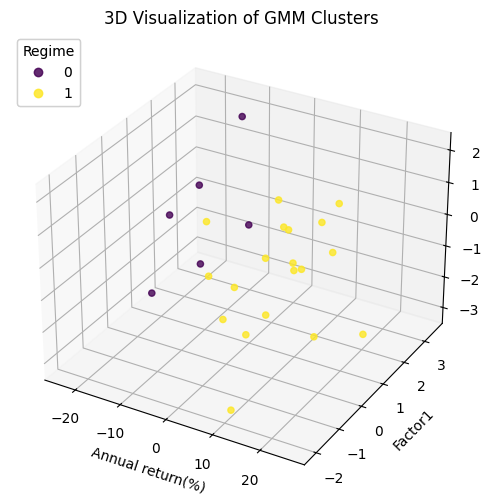

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D projection

# Extract the 3D data used for clustering
X = df[['Annual return(%)', 'Factor1', 'Factor2','Factor3', 'Factor4']].values
labels = df['Regime'].values  # 0 or 1

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter, with color-coded clusters
scatter = ax.scatter(
    X[:,0], X[:,1], X[:,2],
    c=labels, cmap='viridis', alpha=0.8
)

ax.set_xlabel('Annual return(%)')
ax.set_ylabel('Factor1')
ax.set_zlabel('Factor2')
ax.set_title('3D Visualization of GMM Clusters')

# Optionally, create a legend from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Regime")
ax.add_artist(legend1)

plt.show()

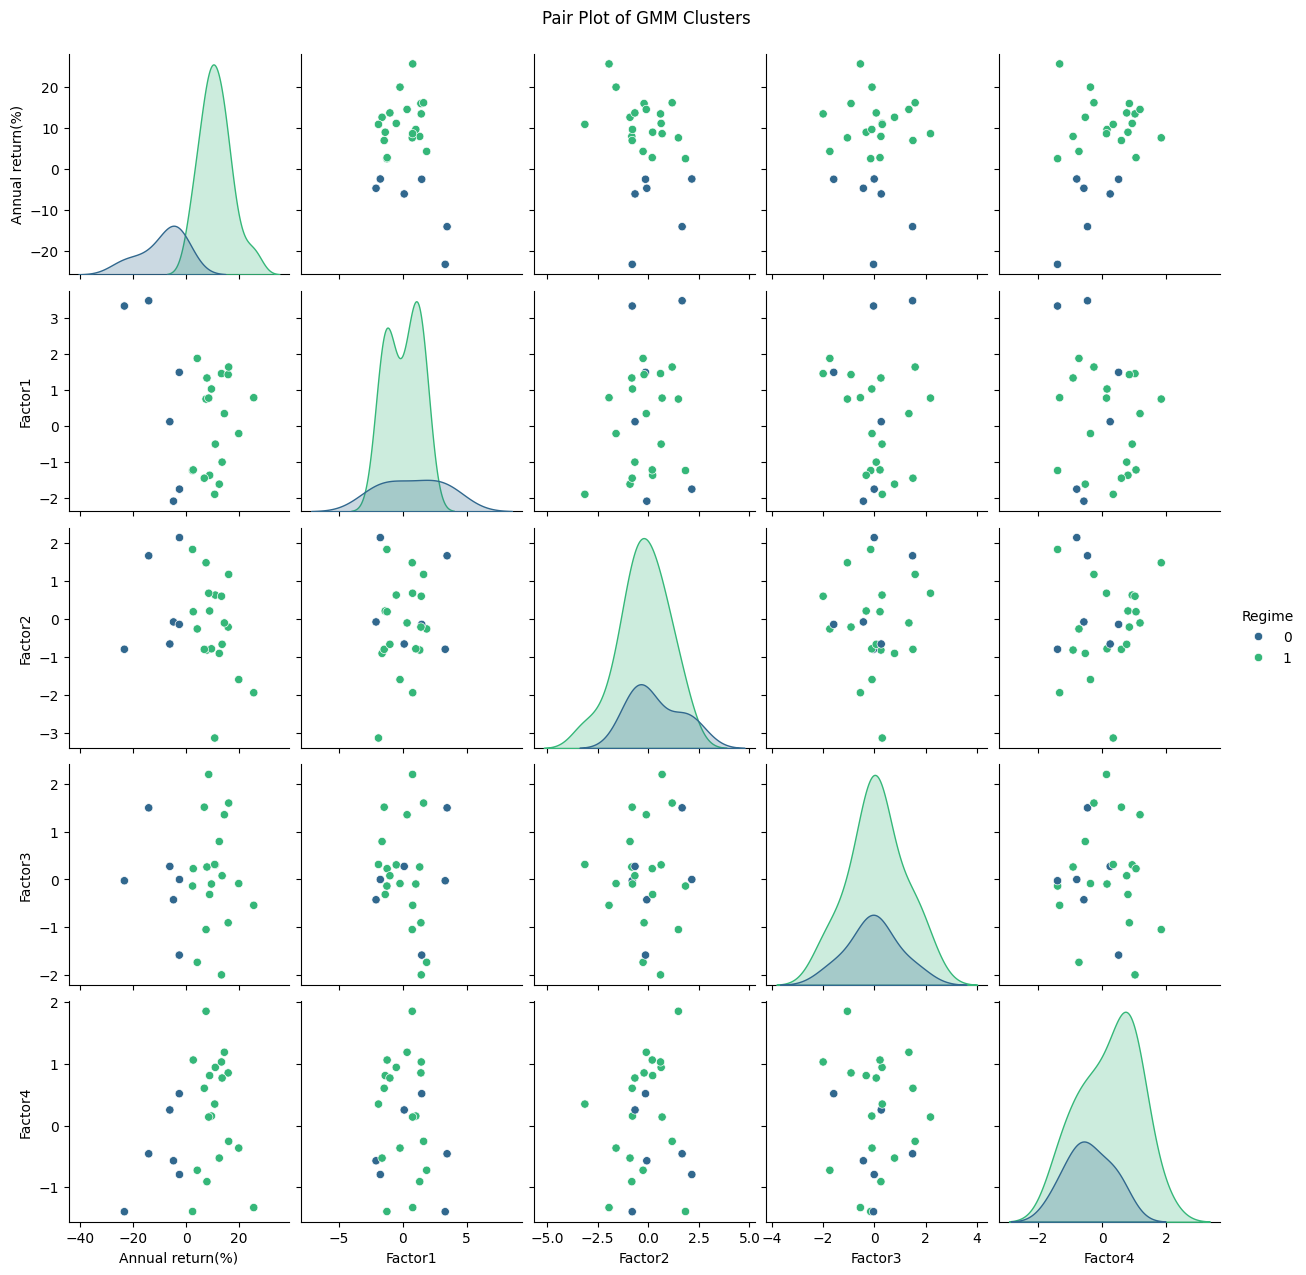

In [ ]:
import seaborn as sns

# Create a DataFrame of the relevant columns including the cluster label
df_clust = df[['Annual return(%)', 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Regime']]

sns.pairplot(
    df_clust,
    vars=['Annual return(%)', 'Factor1', 'Factor2', 'Factor3', 'Factor4', ],
    hue='Regime',
    palette='viridis',
    diag_kind='kde'  # or 'hist' if you prefer
)
plt.suptitle('Pair Plot of GMM Clusters', y=1.02)
plt.show()

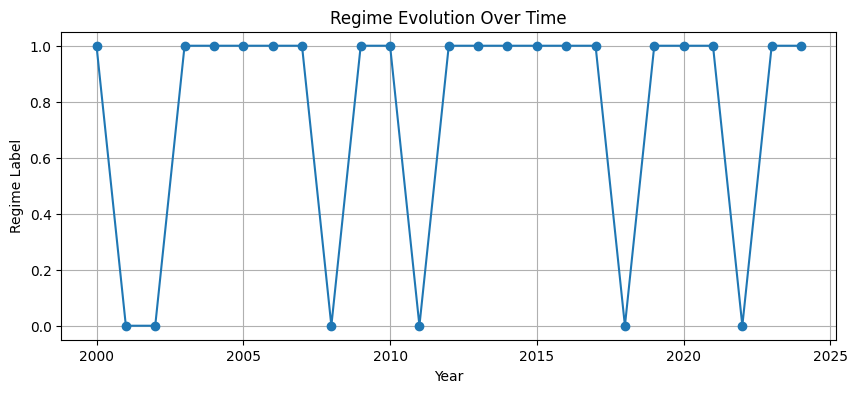

In [ ]:
# 5. (Optional) Temporal Analysis
# If your data is indexed by year, you can visualize regime evolution over time.
# For instance, if 'Year' is the DataFrame index:
if 'Year' in df.index.names:
    plt.figure(figsize=(10,4))
    plt.plot(df.index, df['Regime'], marker='o')
    plt.title('Regime Evolution Over Time')
    plt.xlabel('Year')
    plt.ylabel('Regime Label')
    plt.grid(True)
    plt.show()

# Support Vector Regression Model

In [ ]:
df.head()

,Equities,Fixed Income,Real Estate,Renewable Energy,Equity Returns (%),Fixed income Returns (%),Unlisted real estate Returns (%),Unlisted renewable infrastructure Returns (%),Annual return(%),Accumulated annualised return(%),...,Unemployment Rate (%),Commodity Price(Crude Oil per Barrel),Factor1,Factor2,Factor3,Factor4,AnnualReturn_lag1,AnnualReturn_lag2,AnnualReturn_MA3,Regime
Year,,,,,,,,,,,,,,,,,,,,,
2000,1.732388e+10,2.576002e+10,0.0,0.0,-5.82,8.41,0.0,0.0,2.49,7.98,...,3.46,30.38,-1.244093,1.836808,-0.136824,-1.391200,12.44,9.26,8.063333,1
2001,2.742497e+10,4.046521e+10,0.0,0.0,-14.60,5.04,0.0,0.0,-2.47,5.27,...,3.74,25.98,-1.761483,2.149716,-0.000655,-0.791889,2.49,12.44,4.153333,0
2002,3.306279e+10,5.507672e+10,0.0,0.0,-24.39,9.90,0.0,0.0,-4.74,3.19,...,4.02,26.19,-2.095917,-0.075585,-0.423057,-0.568703,-2.47,2.49,-1.573333,0
2003,5.428772e+10,7.277246e+10,0.0,0.0,22.84,5.26,0.0,0.0,12.59,4.70,...,4.22,31.08,-1.623005,-0.905461,0.791434,-0.525356,-4.74,-2.47,1.793333,1
2004,6.867862e+10,9.779482e+10,0.0,0.0,13.00,6.10,0.0,0.0,8.94,5.29,...,4.26,41.51,-1.375557,0.213811,-0.313049,0.811198,12.59,-4.74,5.596667,1


In [ ]:
df.describe()

,Equities,Fixed Income,Real Estate,Renewable Energy,Equity Returns (%),Fixed income Returns (%),Unlisted real estate Returns (%),Unlisted renewable infrastructure Returns (%),Annual return(%),Accumulated annualised return(%),...,Unemployment Rate (%),Commodity Price(Crude Oil per Barrel),Factor1,Factor2,Factor3,Factor4,AnnualReturn_lag1,AnnualReturn_lag2,AnnualReturn_MA3,Regime
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000
mean,4.602849e+11,2.338355e+11,1.280929e+10,2.826372e+08,7.498400,3.807200,2.281200,-0.189600,6.382400,5.533200,...,3.712400,63.686800,0.212795,-0.089702,0.060792,0.073586,6.536400,6.261200,6.393333,0.76000
std,3.721819e+11,1.196796e+11,1.426194e+10,6.710829e+08,18.020493,4.871186,5.662915,3.921185,10.779387,1.035486,...,0.583147,24.026681,1.598539,1.225711,1.051567,0.895971,10.839574,10.671629,4.205447,0.43589
min,1.732388e+10,2.576002e+10,0.000000e+00,0.000000e+00,-40.710000,-12.110000,-12.370000,-17.690000,-23.310000,2.940000,...,2.490000,25.980000,-2.095917,-3.137864,-1.989663,-1.394204,-23.310000,-23.310000,-3.710000,0.00000
25%,1.162306e+11,1.637351e+11,0.000000e+00,0.000000e+00,-5.820000,0.560000,0.000000,0.000000,2.490000,5.050000,...,3.400000,43.290000,-1.244093,-0.796249,-0.423057,-0.568703,2.490000,2.490000,3.976667,1.00000
50%,4.197170e+11,2.614107e+11,4.513489e+09,0.000000e+00,12.470000,4.320000,0.000000,0.000000,8.590000,5.700000,...,3.690000,65.230000,0.337138,-0.140084,-0.000655,0.155536,8.940000,8.940000,6.833333,1.00000
75%,6.911845e+11,3.133548e+11,2.841077e+10,0.000000e+00,20.760000,6.880000,6.840000,0.000000,13.420000,6.090000,...,4.220000,79.480000,1.421450,0.633323,0.312754,0.811198,13.420000,12.590000,8.943333,1.00000
max,1.242625e+12,4.625283e+11,3.532861e+10,2.231833e+09,34.270000,12.490000,13.640000,5.120000,25.620000,7.980000,...,4.680000,99.670000,3.473266,2.149716,2.190809,1.853227,25.620000,25.620000,15.106667,1.00000


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, Flatten
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
# Split Data into Features (X) and Target (Y)
features = df[['Factor4','Factor1','Factor2','Regime']]
target = df['Annual return(%)']

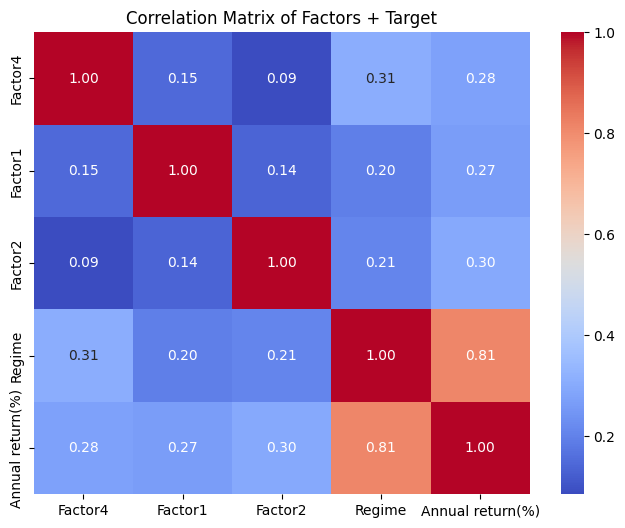

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose df already contains your factors and target
# We'll define the columns we're interested in analyzing for multicollinearity:
feature_cols = ['Factor4','Factor1','Factor2','Regime']
target_col = 'Annual return(%)'

# Optionally, combine them if you want to see how each factor correlates with the target as well:
df_factors = df[feature_cols + [target_col]]

# 1. Compute correlation matrix (absolute values to capture strength regardless of sign)
corr_matrix = df_factors.corr().abs()

# 2. Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Factors + Target')
plt.show()

In [ ]:
# Normalizing the features
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_features.fit_transform(features)

# Normalizing the target
scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler_target.fit_transform(target.values.reshape(-1, 1))

In [ ]:
# Splitting data into training and testing sets (80% train, 20% test)
train_size = int(len(scaled_features) * 0.6)
X_train = scaled_features[:train_size, :]
X_test = scaled_features[train_size:, :]

# The target is flattened to create a 1D array for the SVR model.
y_train = scaled_target[:train_size].flatten()
y_test = scaled_target[train_size:].flatten()    # Exogenous variables for forecasting


In [ ]:
from sklearn.svm import SVR

# Initialize the SVR model (default kernel is RBF)
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model on the training data
svr_model.fit(X_train, y_train)

# In-sample predictions on the training data
train_pred_scaled = svr_model.predict(X_train)

In [ ]:
# Forecasting on the test data
test_pred_scaled = svr_model.predict(X_test)

# --- Inverse Transform Predictions and Targets ---

# Transform predictions back to the original scale
train_pred = scaler_target.inverse_transform(train_pred_scaled.reshape(-1, 1))
y_train_original = scaler_target.inverse_transform(y_train.reshape(-1, 1))

test_pred = scaler_target.inverse_transform(test_pred_scaled.reshape(-1, 1))
y_test_original = scaler_target.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# --- Calculate Performance Metrics ---

# Training Metrics
train_mse = mean_squared_error(y_train_original, train_pred)
train_mae = mean_absolute_error(y_train_original, train_pred)
train_r2 = r2_score(y_train_original, train_pred)

# Testing Metrics
test_mse = mean_squared_error(y_test_original, test_pred)
test_mae = mean_absolute_error(y_test_original, test_pred)
test_r2 = r2_score(y_test_original, test_pred)

print(f"Training Metrics (Original Scale): MSE: {train_mse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing Metrics (Original Scale): MSE: {test_mse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

Training Metrics (Original Scale): MSE: 11.9276, MAE: 3.0614, R2: 0.8989
Testing Metrics (Original Scale): MSE: 25.7211, MAE: 4.0413, R2: 0.7439


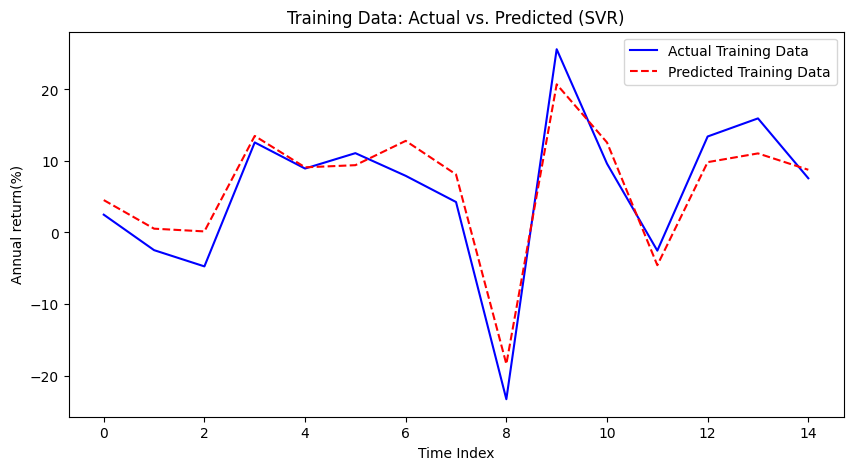

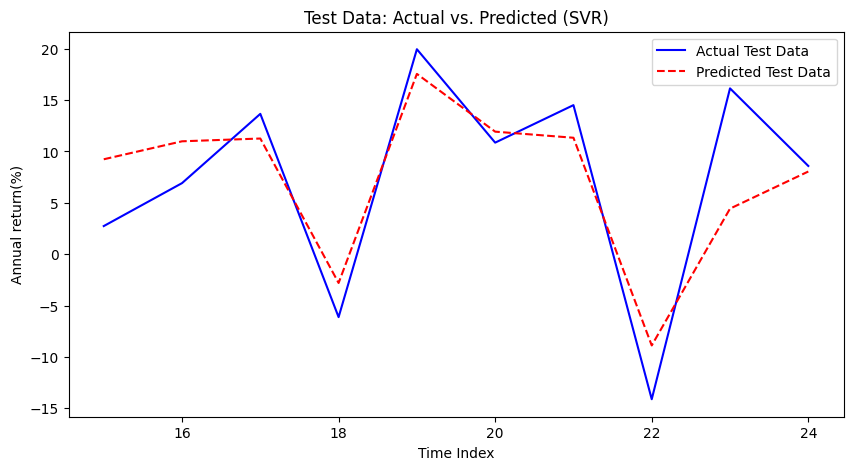

In [ ]:
# --- Plot 1: Training Data (Actual vs. Predicted) ---
plt.figure(figsize=(10, 5))
plt.plot(y_train_original, label='Actual Training Data', color='blue')
plt.plot(train_pred, label='Predicted Training Data', color='red', linestyle='--')
plt.title('Training Data: Actual vs. Predicted (SVR)')
plt.xlabel('Time Index')
plt.ylabel('Annual return(%)')
plt.legend()
plt.show()

# --- Plot 2: Test Data (Actual vs. Predicted) ---
plt.figure(figsize=(10, 5))
# Create a time index for the test data starting from train_size
test_index = np.arange(train_size, train_size + len(y_test_original))
plt.plot(test_index, y_test_original, label='Actual Test Data', color='blue')
plt.plot(test_index, test_pred, label='Predicted Test Data', color='red', linestyle='--')
plt.title('Test Data: Actual vs. Predicted (SVR)')
plt.xlabel('Time Index')
plt.ylabel('Annual return(%)')
plt.legend()
plt.show()


# SVR Model for Forecasting:
Use the SVR model to forecast your target (e.g., annual returns). After fitting the SVR, calculate the residuals (errors) of your in-sample and out-of-sample predictions.

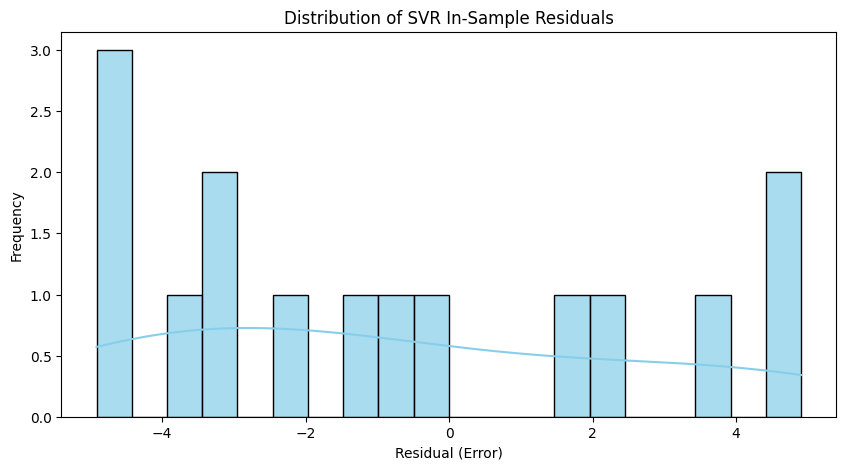

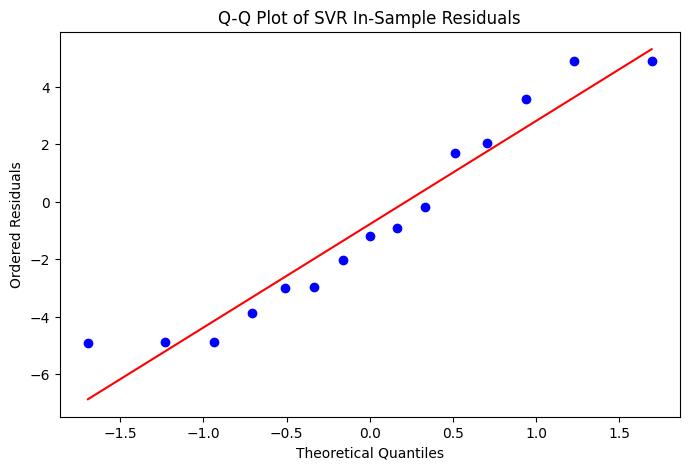

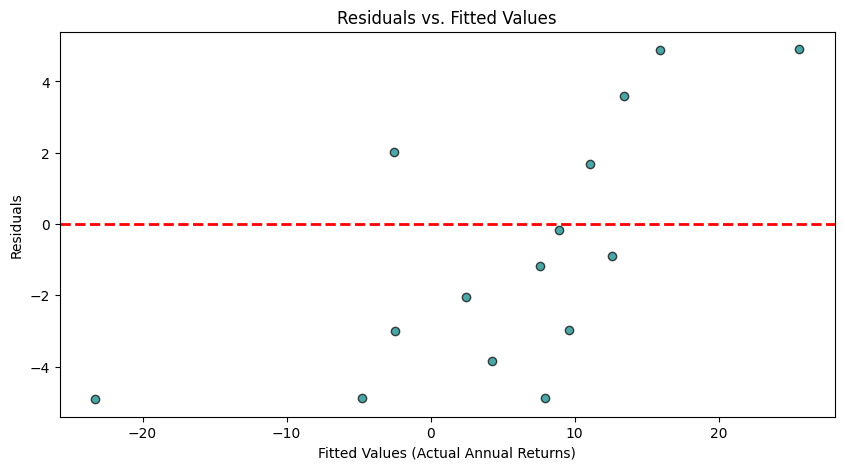

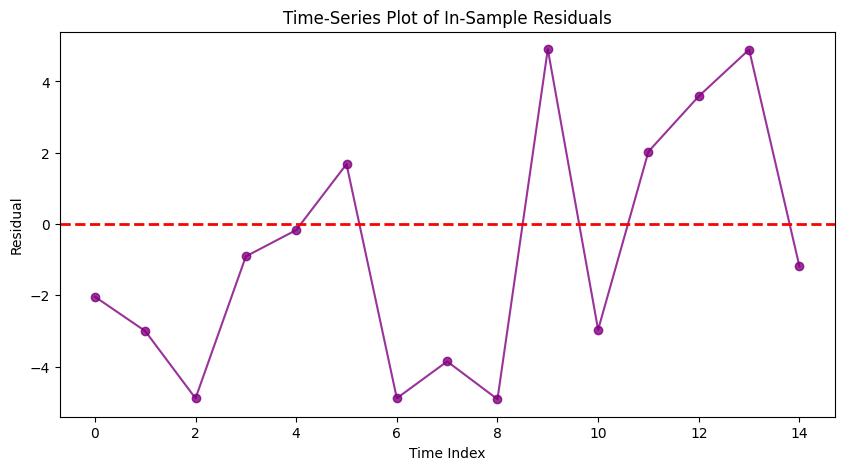

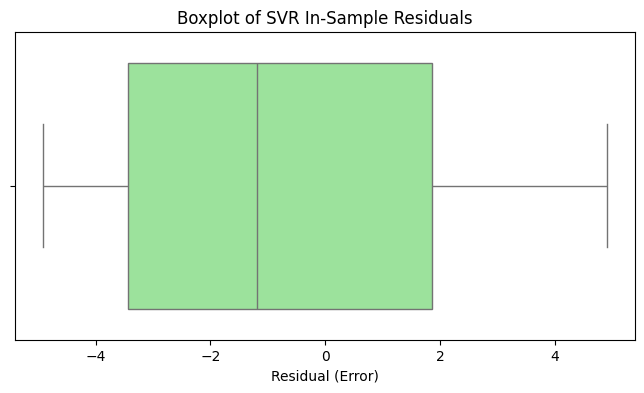

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate in-sample residuals
train_residuals = (y_train_original - train_pred).flatten()

# Calculate in-sample residuals
train_residuals = (y_train_original - train_pred).flatten()

# 1. Histogram with KDE Overlay
plt.figure(figsize=(10, 5))
sns.histplot(train_residuals, bins=20, kde=True, color='skyblue', edgecolor='k', alpha=0.7)
plt.title('Distribution of SVR In-Sample Residuals')
plt.xlabel('Residual (Error)')
plt.ylabel('Frequency')
plt.show()

# 2. Q-Q Plot for Normality Check
plt.figure(figsize=(8, 5))
stats.probplot(train_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of SVR In-Sample Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Residuals')
plt.show()

# 3. Residuals vs. Fitted Values Scatter Plot
fitted_values = y_train_original.flatten()  # Actual target values
plt.figure(figsize=(10, 5))
plt.scatter(fitted_values, train_residuals, alpha=0.7, color='teal', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values (Actual Annual Returns)')
plt.ylabel('Residuals')
plt.show()

# 4. Time-Series Plot of Residuals (if the data is ordered by time)
plt.figure(figsize=(10, 5))
plt.plot(train_residuals, marker='o', linestyle='-', color='purple', alpha=0.8)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Time-Series Plot of In-Sample Residuals')
plt.xlabel('Time Index')
plt.ylabel('Residual')
plt.show()

# 5. Boxplot of Residuals to Highlight Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=train_residuals, color='lightgreen')
plt.title('Boxplot of SVR In-Sample Residuals')
plt.xlabel('Residual (Error)')
plt.show()


# Residual Analysis & Bootstrapping:
 scenario generator, model the residuals using classical statistical techniques. use a non-parametric bootstrap to capture the empirical distribution of errors.

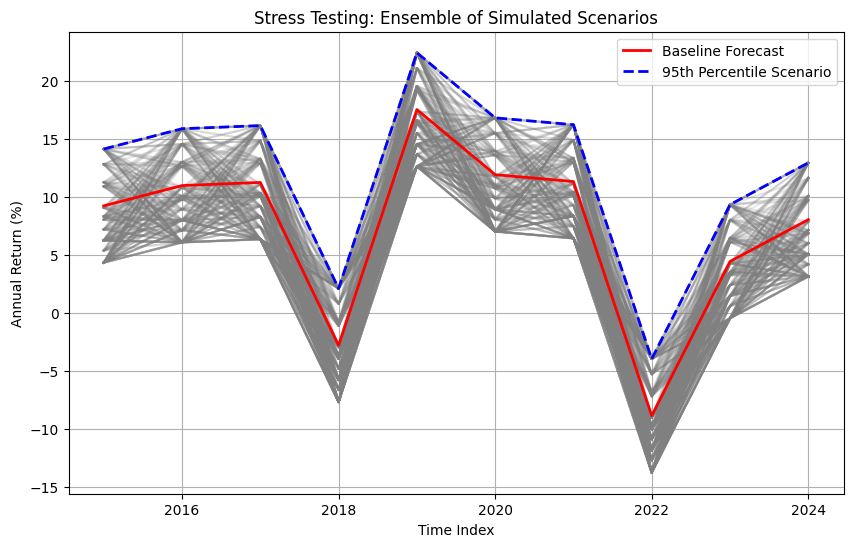

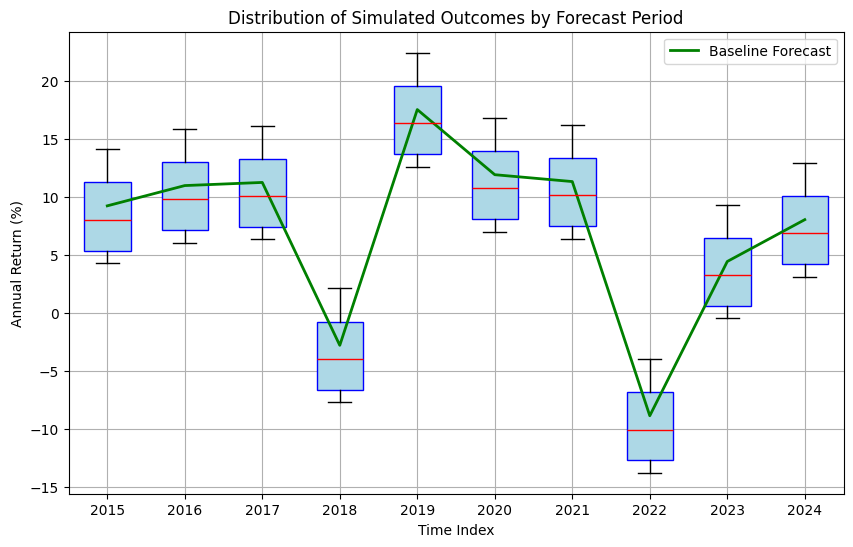

In [ ]:
# Define the starting forecast year
start_year = 2015


num_scenarios = 1000  # Number of stress test scenarios
forecast_horizon = len(X_test)  # e.g., 5 test observations

# Ensure train_residuals is 1D
train_residuals = train_residuals.flatten()

# Generate bootstrapped errors: shape (1000, forecast_horizon)
bootstrapped_errors = np.random.choice(train_residuals,
                                       size=(num_scenarios, forecast_horizon),
                                       replace=True)

# Baseline forecast from SVR (ensure it's 1D)
baseline_forecast = test_pred.flatten()

# Generate scenarios by adding bootstrapped errors to the baseline forecast
scenarios = baseline_forecast + bootstrapped_errors

# -----------------------------
# Visualization 1: Scenario Ensemble Plot

# Calculate the 5th percentile (stress scenario) across scenarios for each time step
VaR_5 = np.percentile(scenarios, 95, axis=0)

time_index = np.arange(start_year,start_year + forecast_horizon)

plt.figure(figsize=(10, 6))

# Plot each simulated scenario as a thin grey line for visual density
for i in range(num_scenarios):
    plt.plot(time_index, scenarios[i, :], color='grey', alpha=0.05)

# Plot the baseline forecast in red
plt.plot(time_index, baseline_forecast, label='Baseline Forecast', color='red', linewidth=2)

# Plot the 5th percentile scenario in blue dashed line
plt.plot(time_index, VaR_5, label='95th Percentile Scenario', color='blue', linestyle='--', linewidth=2)

plt.title('Stress Testing: Ensemble of Simulated Scenarios')
plt.xlabel('Time Index')
plt.ylabel('Annual Return (%)')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Visualization 2: Boxplot per Forecast Period

plt.figure(figsize=(10, 6))
plt.boxplot(scenarios, positions=time_index, widths=0.6,
            patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))
plt.plot(time_index, baseline_forecast, label='Baseline Forecast', color='green', linewidth=2)
plt.title('Distribution of Simulated Outcomes by Forecast Period')
plt.xlabel('Time Index')
plt.ylabel('Annual Return (%)')
plt.legend()
plt.grid(True)
plt.show()

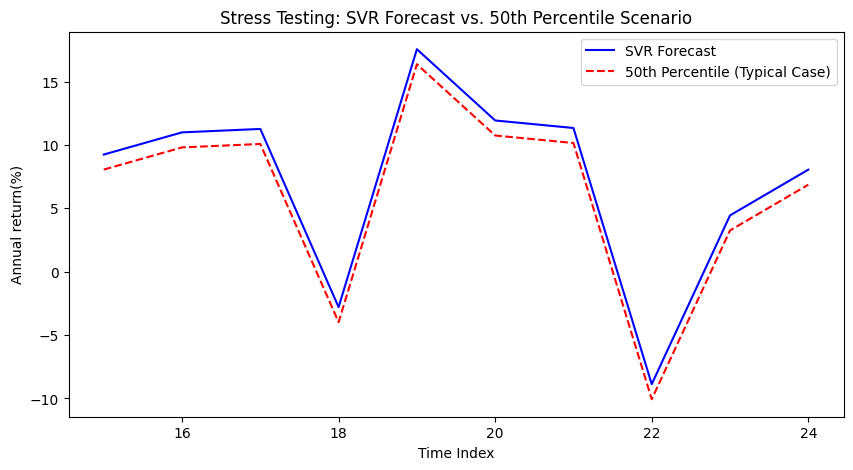

In [ ]:
# --- STEP 5: Stress Testing & Sensitivity Analysis ---

# For example, compute risk metrics like Value at Risk (VaR) for each forecast time step.
# Here we calculate the 5th percentile across scenarios for each time point.
VaR_5 = np.percentile(scenarios, 50, axis=0)

# Plot the baseline forecast with the stress VaR envelope.
plt.figure(figsize=(10, 5))
time_index = np.arange(train_size, train_size + forecast_horizon)
plt.plot(time_index, baseline_forecast, label='SVR Forecast', color='blue')
plt.plot(time_index, VaR_5, label='50th Percentile (Typical Case)', color='red', linestyle='--')
plt.title('Stress Testing: SVR Forecast vs. 50th Percentile Scenario')
plt.xlabel('Time Index')
plt.ylabel('Annual return(%)')
plt.legend()
plt.show()

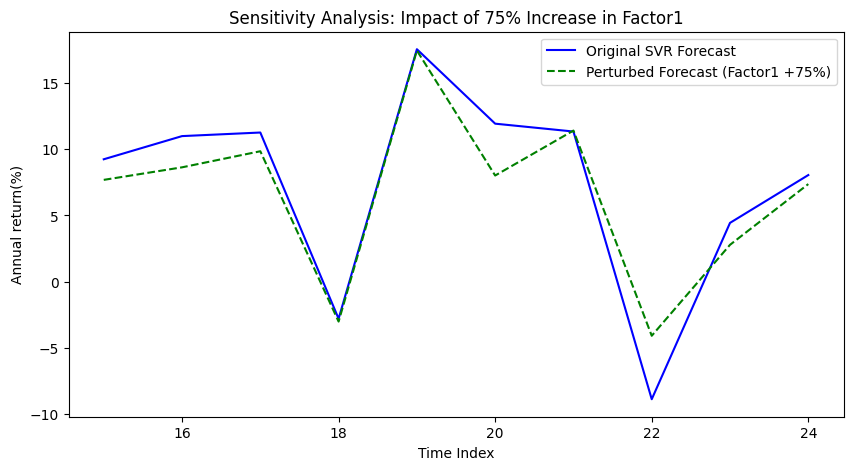

Test Metrics (Perturbed SVR Forecast): MSE: 35.5969, MAE: 9.4227, R2: 0.6456
Test Metrics (SVR Forecast): MSE: 25.7211, MAE: 9.6810, R2: 0.7439


In [ ]:
# Sensitivity Analysis: Perturb key features (e.g., Factor1) and re-run forecasting
# Example: Increase Factor1 by 10% and observe the change in the forecast
perturbed_features = features.copy()
perturbed_features['Factor1'] = perturbed_features['Factor1'] * 1.75  # 10% increase

# Scale the perturbed features using the same scaler
perturbed_scaled_features = scaler_features.transform(perturbed_features)

# Extract perturbed test set features
X_test_perturbed = perturbed_scaled_features[train_size:, :]
# Generate new forecast with perturbed data
perturbed_pred_scaled = svr_model.predict(X_test_perturbed)
perturbed_pred = scaler_target.inverse_transform(perturbed_pred_scaled.reshape(-1, 1)).flatten()

# Plot the original vs. perturbed forecast
plt.figure(figsize=(10, 5))
plt.plot(time_index, baseline_forecast, label='Original SVR Forecast', color='blue')
plt.plot(time_index, perturbed_pred, label='Perturbed Forecast (Factor1 +75%)', color='green', linestyle='--')
plt.title('Sensitivity Analysis: Impact of 75% Increase in Factor1')
plt.xlabel('Time Index')
plt.ylabel('Annual return(%)')
plt.legend()
plt.show()

# Finally, print performance metrics for the SVR on the test set
test_mse = mean_squared_error(y_test_original, baseline_forecast)
test_mae = np.mean(np.abs(y_test_original - baseline_forecast))
test_r2 = r2_score(y_test_original, baseline_forecast)

# Compute performance metrics for the perturbed forecast
test_mse_perturbed = mean_squared_error(y_test_original, perturbed_pred)
test_mae_perturbed = np.mean(np.abs(y_test_original - perturbed_pred))
test_r2_perturbed = r2_score(y_test_original, perturbed_pred)

print(f"Test Metrics (Perturbed SVR Forecast): MSE: {test_mse_perturbed:.4f}, MAE: {test_mae_perturbed:.4f}, R2: {test_r2_perturbed:.4f}")

print(f"Test Metrics (SVR Forecast): MSE: {test_mse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")